# DV Lab 06 

### Perform the following Tasks in Seaborn

##### Import the required libraries and data from csv file "sales_data" and perform the following tasks on it.

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
import plotly.express as px

In [118]:
sales_data = pd.read_csv("sales_data.csv")

print(sales_data.head())


   order_id     product     category   price  quantity customer_country
0      1000    Necklace      Jewelry  189.32         1        Australia
1      1001      Laptop  Electronics  133.76         4        Australia
2      1002       Pants     Clothing   42.84         4           Canada
3      1003  Sunglasses  Accessories   54.85         3           Canada
4      1004       Pants     Clothing  142.53         5               UK


#### Plot the total sales per category across all orders.

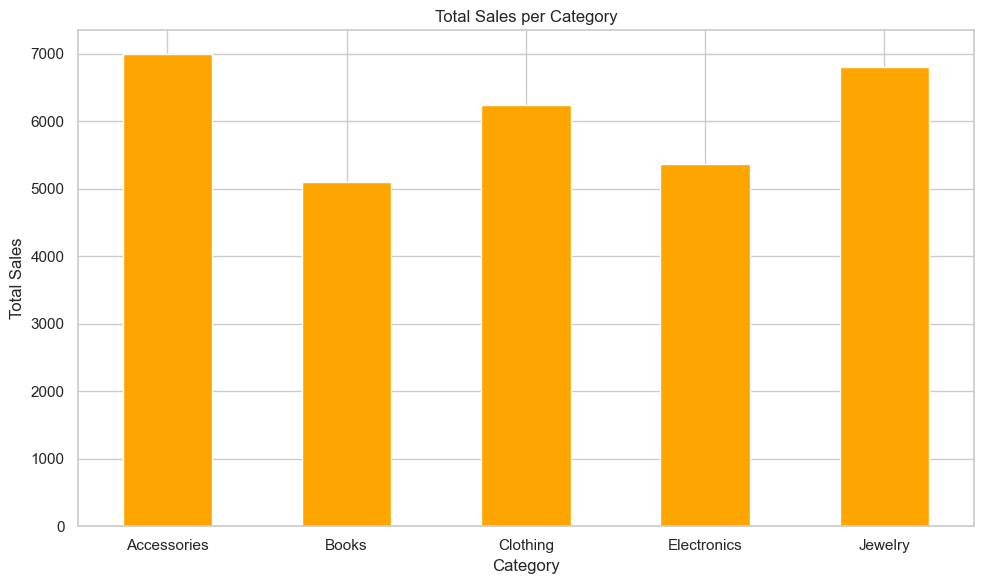

In [119]:
total_sales_per_category = sales_data.groupby('category')['price'].sum()

plt.figure(figsize=(10, 6))
total_sales_per_category.plot(kind='bar', color='orange')
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Visualize the relationship between product price and quantity sold. Add a regression line to show the general trend.

C:\Users\T440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

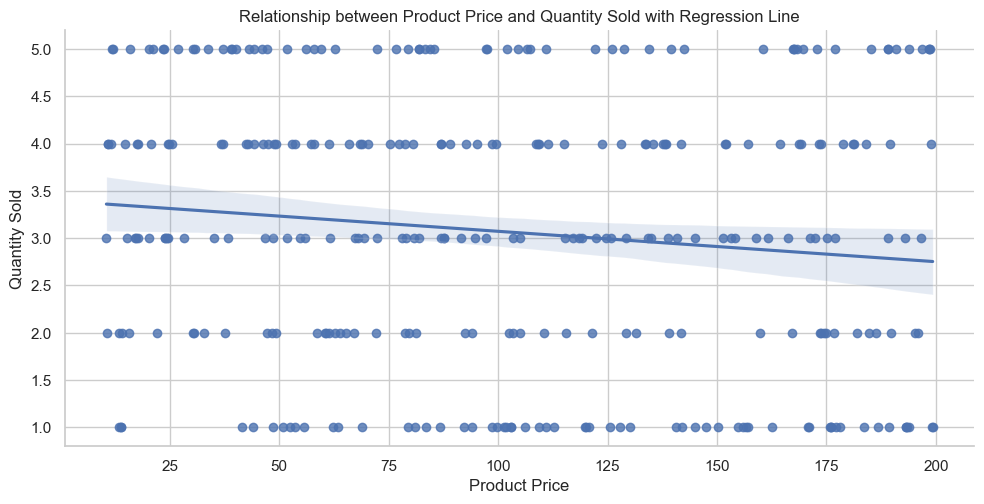

In [120]:

plt.figure(figsize=(10, 6))
sns.lmplot(x='price', y='quantity', data=sales_data, aspect=2)
plt.title('Relationship between Product Price and Quantity Sold with Regression Line')
plt.xlabel('Product Price')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()


#### Explore the distribution of product price within each category using violin plots. Group the plots by customer country using a facet grid.

C:\Users\T440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\T440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\T440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\T440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\T440\AppData\Local\Temp\ipykernel_8336\2083514232.py:12: UserWarning:

The figure layout has changed to tight



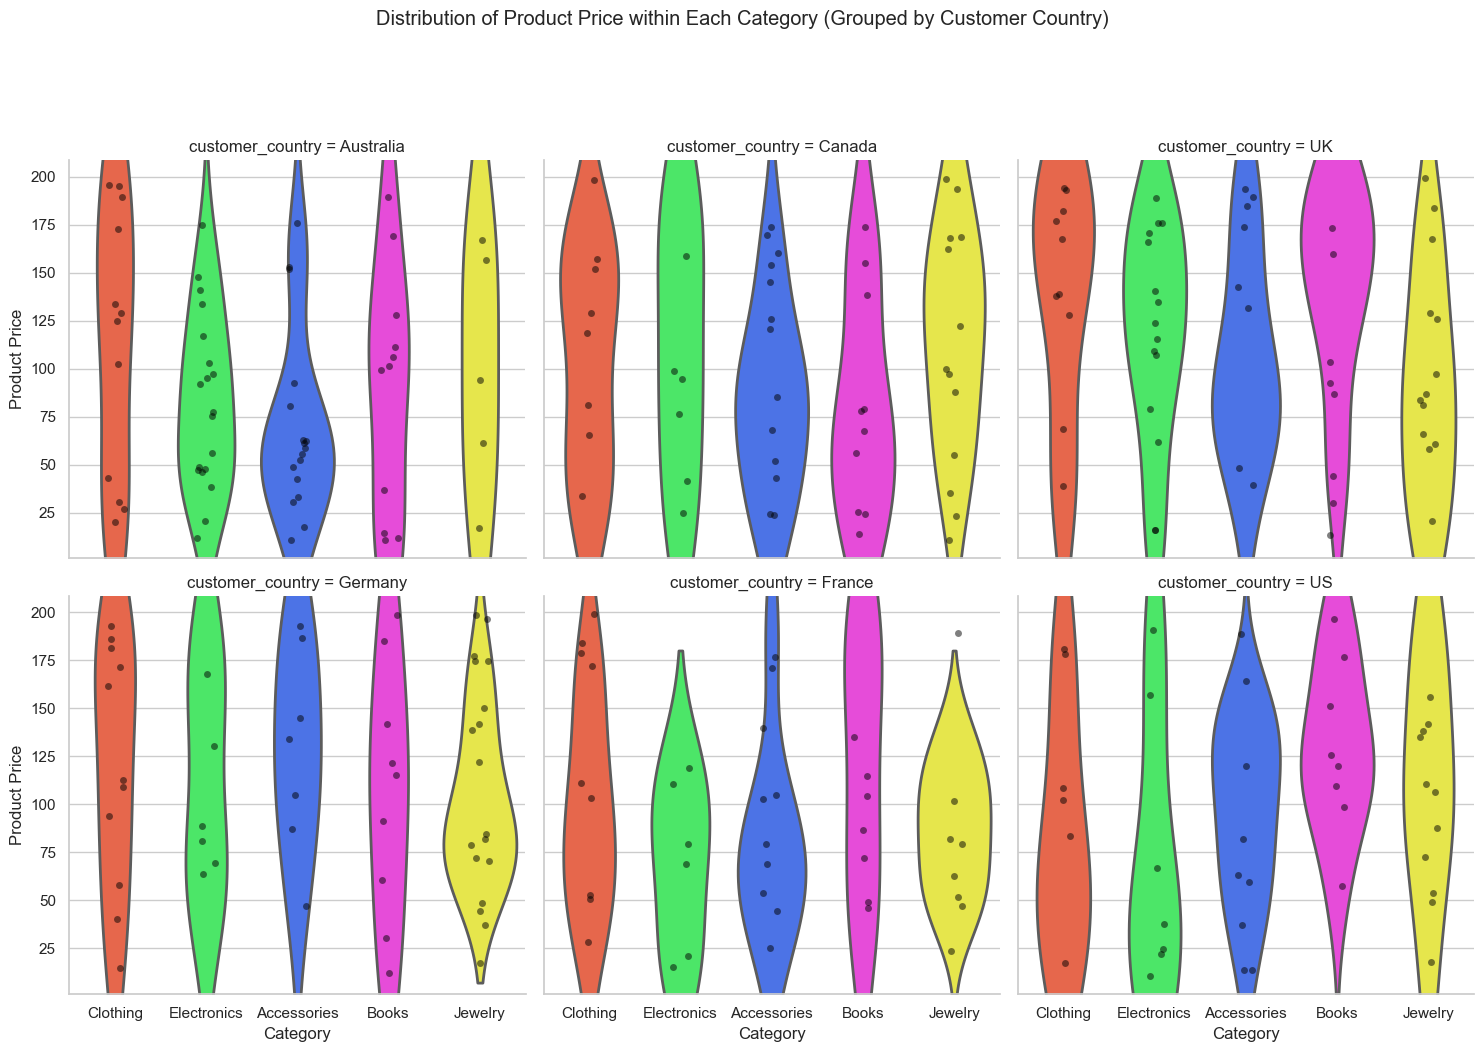

In [121]:
sns.set(style="whitegrid")

colors = ["#FF5733", "#33FF57", "#3366FF", "#FF33EE", "#FFFF33"]

g = sns.FacetGrid(sales_data, col="customer_country", col_wrap=3, height=5)
g.map(sns.violinplot, "category", "price", inner=None, palette=colors, linewidth=2)
g.map(sns.stripplot, "category", "price", jitter=True, color="black", alpha=0.5)

g.set_axis_labels("Category", "Product Price")
plt.suptitle("Distribution of Product Price within Each Category (Grouped by Customer Country)", y=1.05)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


#### Create a heatmap visualizing the correlation matrix between product price, quantity, and a potential additional numerical variable (e.g., shipping cost, discount applied). Apply hierarchical clustering to order categories and countries based on their correlations.

In [99]:
df = pd.DataFrame(sales_data)

def calculate_shipping_cost(row):
    shipping_cost_per_product = 7
    return row['quantity'] * shipping_cost_per_product + row['price']

df['shipping_cost'] = df.apply(calculate_shipping_cost, axis=1)

df = df[['order_id', 'product', 'category', 'price', 'quantity', 'shipping_cost', 'customer_country']]

df = df.sort_values(by='order_id')

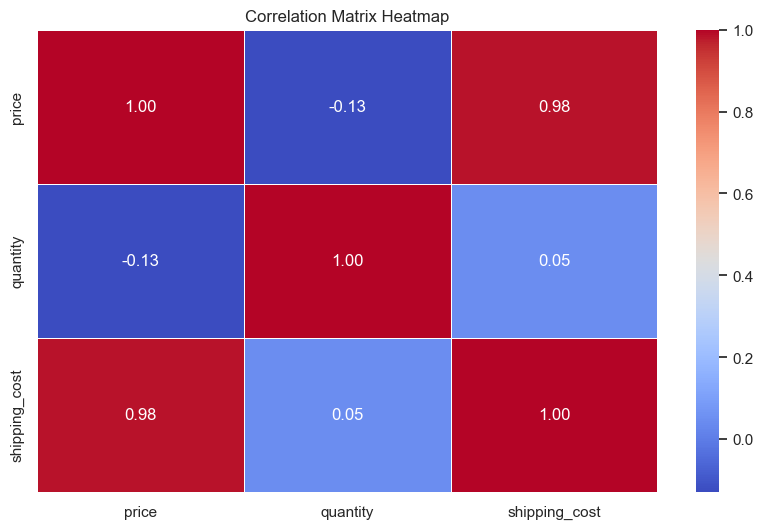

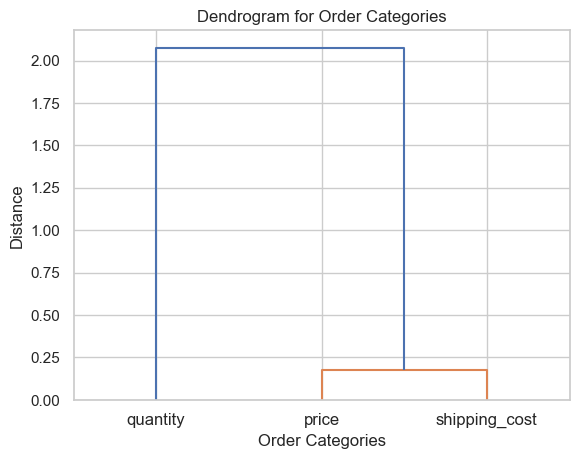

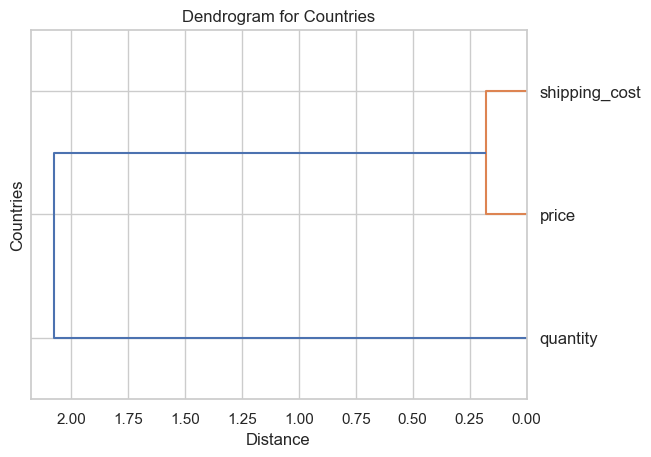

In [100]:
additional_variable = "shipping_cost"

columns_for_correlation = ['price', 'quantity', additional_variable]

correlation_matrix = df[columns_for_correlation].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
order_categories_dendrogram = hierarchy.dendrogram(hierarchy.linkage(correlation_matrix, method='ward'),
                                                   labels=columns_for_correlation,
                                                   orientation='top')

plt.title('Dendrogram for Order Categories')
plt.xlabel('Order Categories')
plt.ylabel('Distance')
plt.show()

countries_dendrogram = hierarchy.dendrogram(hierarchy.linkage(correlation_matrix.T, method='ward'),
                                             labels=correlation_matrix.columns,
                                             orientation='left')

plt.title('Dendrogram for Countries')
plt.xlabel('Distance')
plt.ylabel('Countries')
plt.show()

#### Explore the relationships between all numerical variables in your data (price, quantity, shipping cost, etc.) using a pairplot. This provides a quick overview of pairwise correlations and potential outliers.

C:\Users\T440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



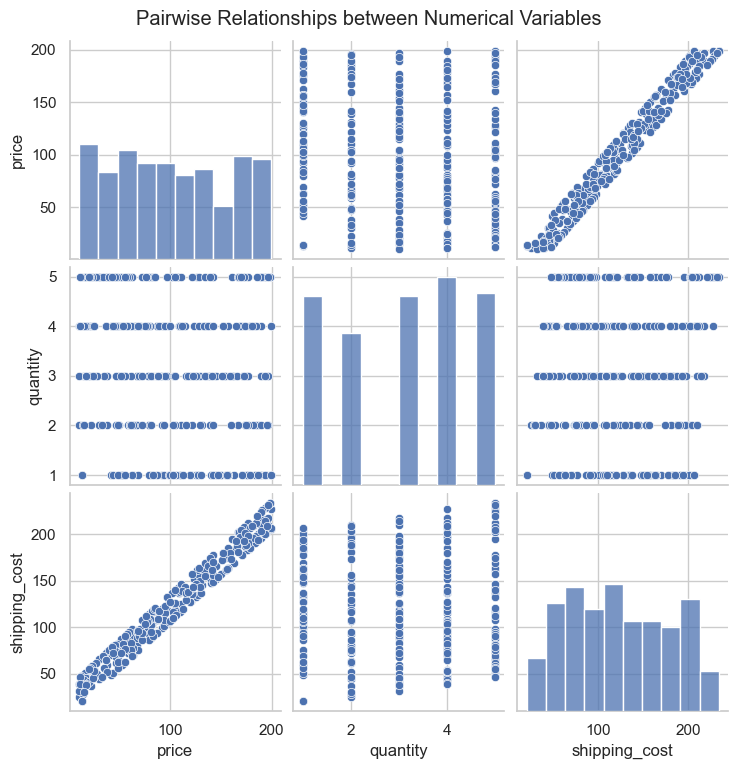

In [101]:
numerical_variables = ['price', 'quantity','shipping_cost']  

sns.pairplot(df[numerical_variables])
plt.suptitle('Pairwise Relationships between Numerical Variables', y=1.02)
plt.show()



### Perform the Following Tasks in Plotly 

#### Plot the total sales per category using an interactive bar chart where users can hover over bars to see details (category and total sales).

In [123]:
total_sales_per_category_df = total_sales_per_category.reset_index(name='Total Sales')

color_scale = px.colors.qualitative.Dark2

fig = px.bar(total_sales_per_category_df, x='category', y='Total Sales',
             labels={'category': 'Category', 'Total Sales': 'Total Sales'},
             title='Total Sales per Category',
             hover_data={'category': True, 'Total Sales': True},
             color='category', color_discrete_sequence=color_scale)

fig.show()

#### Create a scatter plot visualizing the relationship between product price and quantity sold, color-coded by customer country.

In [105]:
fig = px.scatter(sales_data, x='price', y='quantity', color='customer_country',
                 labels={'price': 'Product Price', 'quantity': 'Quantity Sold'},
                 title='Relationship between Product Price and Quantity Sold (Color-coded by Customer Country)',
                 hover_data={'price': True, 'quantity': True, 'customer_country': True})

fig.show()

#### Create a scatter plot visualizing the relationship between product price and quantity sold, color-coded by customer country.

In [106]:
fig = px.scatter(sales_data, x='price', y='quantity', color='customer_country',
                 labels={'price': 'Product Price', 'quantity': 'Quantity Sold'},
                 title='Relationship between Product Price and Quantity Sold (Color-coded by Customer Country)',
                 hover_data={'price': True, 'quantity': True, 'customer_country': True})

fig.show()

#### Visualize the average order value per country on a world map, colored by the average value.

In [108]:
avg_order_value_per_country = sales_data.groupby('customer_country')['price'].mean().reset_index()

fig = px.choropleth(avg_order_value_per_country,
                    locations='customer_country',
                    locationmode='country names',
                    color='price',
                    color_continuous_scale='Viridis',  
                    labels={'price': 'Average Order Value'},
                    title='Average Order Value per Country',
                    )

fig.show()

#### Visualize the relationship between product price, quantity sold, and a third numerical variable (e.g., shipping cost) using a 3D scatter plot. Color-code the data points based on the customer country.

In [109]:
import plotly.graph_objects as go

country_colors = {
    'Australia': 'blue',
    'Canada': 'green',
    'UK': 'red',
    'Germany': 'orange',
    'France': 'purple'
}

fig = go.Figure()

for country, color in country_colors.items():
    data = df[df['customer_country'] == country]
    fig.add_trace(go.Scatter3d(
        x=data['price'],
        y=data['quantity'],
        z=data['shipping_cost'],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.7,
            color=color,  
        ),
        name=country
    ))

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Product Price'),
        yaxis=dict(title='Quantity Sold'),
        zaxis=dict(title='Shipping Cost'),
    ),
    title='Relationship between Product Price, Quantity Sold, and Shipping Cost',
)

fig.show()
